In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the asthma dataset from the provided Excel file. The Excel file is downloaded from datasource
asthama_df = pd.read_excel('/content/drive/MyDrive/DATA_512_HW_3/percentage_of_tenthgraders_with_asthama.xlsx')
asthama_df.head()

,LocationType,Location,TimeFrame,DataFormat,Data
0,State,Washington,2008,Percent,0.208
1,State,Washington,2006,Percent,0.19
2,State,Washington,2010,Percent,0.192
3,State,Washington,2012,Percent,0.222
4,State,Washington,2014,Percent,0.215


In [ ]:
asthama_df.head(20)

,LocationType,Location,TimeFrame,DataFormat,Data
0,State,Washington,2008,Percent,0.208
1,State,Washington,2006,Percent,0.19
2,State,Washington,2010,Percent,0.192
3,State,Washington,2012,Percent,0.222
4,State,Washington,2014,Percent,0.215
5,State,Washington,2016,Percent,0.211
6,State,Washington,2018,Percent,0.213
7,County,Adams,2008,Percent,0.148
8,County,Adams,2006,Percent,0.083
9,County,Adams,2010,Percent,0.22


In [ ]:
# Filter the asthma dataset to include only data relevant to Yakima
yakima_asthma_data = asthama_df[asthama_df['Location'] == 'Yakima']

# Rename the columns for clarity and consistency
# 'TimeFrame' is renamed to 'year' to clearly represent the year of the data
# 'Data' is renamed to 'asthma_rate' to specify that the data represents the rate of asthma
yakima_asthma_data = yakima_asthma_data.rename(columns={'TimeFrame': 'year', 'Data': 'asthma_rate'})

In [ ]:
yakima_asthma_data.head(10)

,LocationType,Location,year,DataFormat,asthma_rate
273,County,Yakima,2008,Percent,0.194
274,County,Yakima,2006,Percent,0.163
275,County,Yakima,2010,Percent,0.178
276,County,Yakima,2012,Percent,0.246
277,County,Yakima,2014,Percent,0.219
278,County,Yakima,2016,Percent,0.215
279,County,Yakima,2018,Percent,0.217


In [ ]:
import pandas as pd

# Set the option to display up to 100 rows and 100 columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

print(yakima_asthma_data)

    LocationType Location  date DataFormat asthma_rate
273       County   Yakima  2008    Percent       0.194
274       County   Yakima  2006    Percent       0.163
275       County   Yakima  2010    Percent       0.178
276       County   Yakima  2012    Percent       0.246
277       County   Yakima  2014    Percent       0.219
278       County   Yakima  2016    Percent       0.215
279       County   Yakima  2018    Percent       0.217


In [ ]:
yakima_asthma_data.head()

,LocationType,Location,date,DataFormat,asthma_rate
273,County,Yakima,2008,Percent,0.194
274,County,Yakima,2006,Percent,0.163
275,County,Yakima,2010,Percent,0.178
276,County,Yakima,2012,Percent,0.246
277,County,Yakima,2014,Percent,0.219


In [ ]:
# The file 'average_aqi_by_year.csv' contains data about average Air Quality Index (AQI) and is stored at the specified path.
smoke_data_path = '/content/drive/My Drive/DATA_512_HW_3/average_aqi_by_year.csv'

# Load the smoke data from the CSV file into a pandas DataFrame.
# Pandas' read_csv function is used to read the contents of the CSV file located at smoke_data_path.
smoke_data = pd.read_csv(smoke_data_path)

In [ ]:
smoke_data.head(10)

,year,estimated_aqi
0,1963,107.356598
1,1964,109.668924
2,1965,116.795963
3,1966,107.244401
4,1967,106.611144
5,1968,110.098367
6,1969,106.960361
7,1970,109.089808
8,1971,98.604415
9,1972,111.085638


In [ ]:
# Merge the datasets
combined_data_cont = pd.merge(yakima_asthma_data, smoke_data, on='year')

In [ ]:
combined_data_cont.head(10)

,year,asthma_rate,estimated_aqi
0,2006,0.1630,111.930515
1,2007,0.1785,113.251067
2,2008,0.1940,107.852241
3,2009,0.1860,106.348538
4,2010,0.1780,107.546301
5,2011,0.2120,101.081196
6,2012,0.2460,102.500589
7,2013,0.2325,115.023267
8,2014,0.2190,115.848802
9,2015,0.2170,108.889486


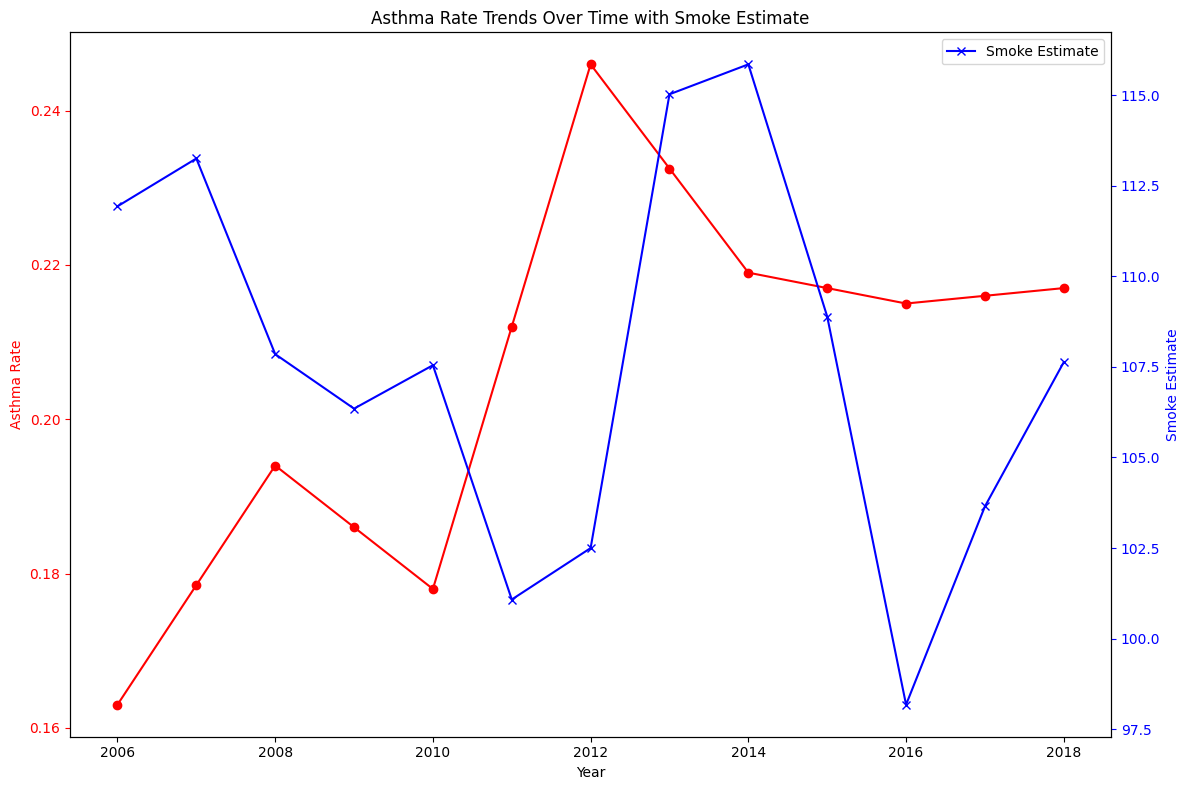

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the column name for the additional data
data_column = 'estimated_aqi'

# Create a new figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot asthma_rate values on the left y-axis
ax1.plot(combined_data_cont['year'], combined_data_cont['asthma_rate'], label='Asthma Rate', marker='o', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Asthma Rate', color='red')
ax1.tick_params('y', colors='red')

# Create a second y-axis for estimated_aqi data on the right
ax2 = ax1.twinx()
ax2.plot(combined_data_cont['year'], combined_data_cont[data_column], label="Smoke Estimate", marker='x', color='blue')
ax2.set_ylabel('Smoke Estimate', color='blue')
ax2.tick_params('y', colors='blue')

# Title and legend
plt.title('Asthma Rate Trends Over Time with Smoke Estimate')
fig.tight_layout()
plt.legend()
plt.show()


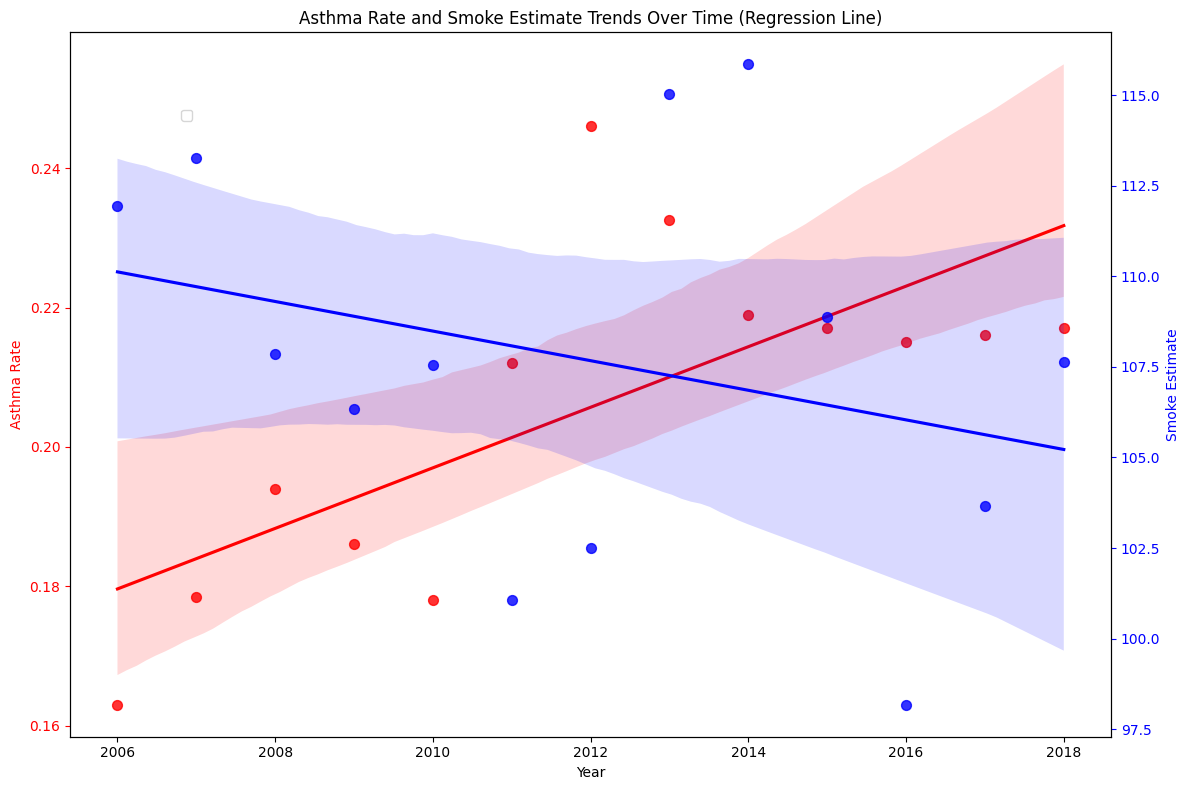

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Scatter plot for asthma_rate values on the left y-axis with regression line
sns.regplot(x='year', y='asthma_rate', data=combined_data_cont, ax=ax1, color='red', scatter_kws={'s': 50})

# Set the labels and title for the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Asthma Rate', color='red')
ax1.tick_params('y', colors='red')

# Create a second y-axis for estimated_aqi data on the right
ax2 = ax1.twinx()
sns.regplot(x='year', y='estimated_aqi', data=combined_data_cont, ax=ax2, color='blue', scatter_kws={'s': 50})

# Set the labels and title for the right y-axis
ax2.set_ylabel('Smoke Estimate', color='blue')
ax2.tick_params('y', colors='blue')

# # Calculate and display the correlation between asthma_rate and estimated_aqi
# correlation = combined_data_cont['asthma_rate'].corr(combined_data_cont['estimated_aqi'])
# plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.01, 0.95), xycoords='axes fraction', fontsize=12, color='black')

# Title and legend
plt.title('Asthma Rate and Smoke Estimate Trends Over Time (Regression Line)')
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

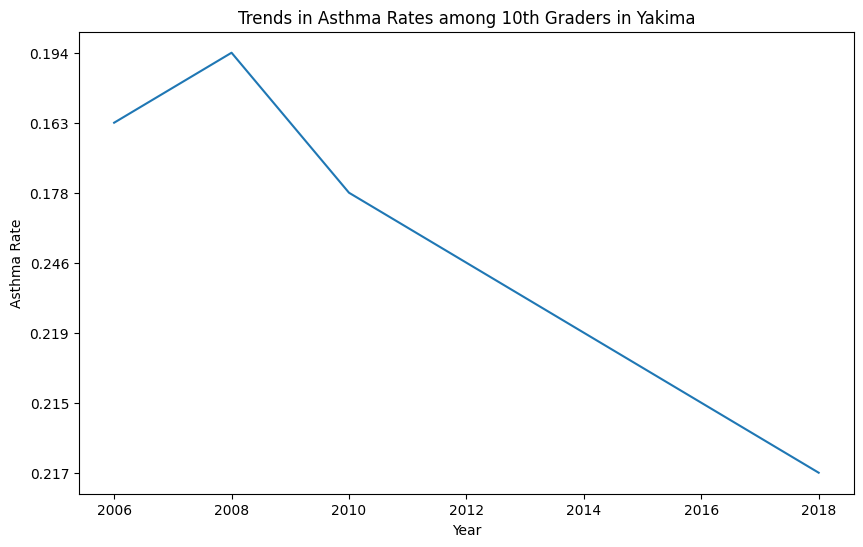

In [ ]:
# EDA
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='asthma_rate', data=combined_data)
plt.title('Trends in Asthma Rates among 10th Graders in Yakima')
plt.xlabel('Year')
plt.ylabel('Asthma Rate')
plt.show()


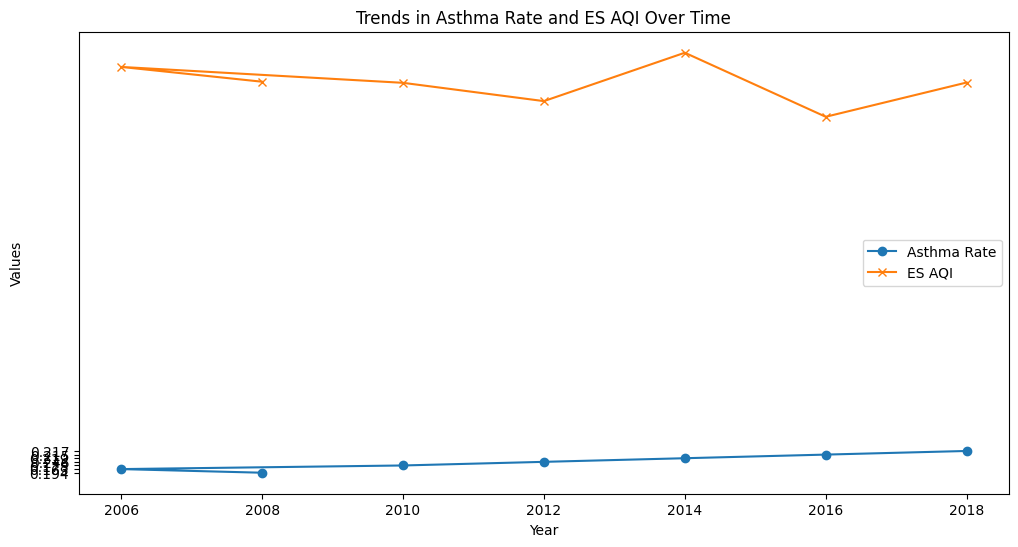

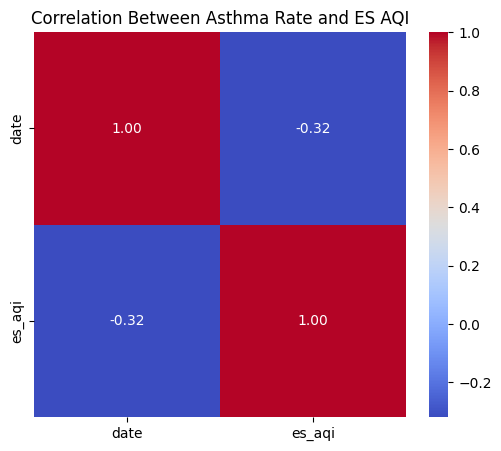

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Trend Analysis Over Time
plt.figure(figsize=(12, 6))
plt.plot(combined_data['date'], combined_data['asthma_rate'], label='Asthma Rate', marker='o')
plt.plot(combined_data['date'], combined_data['es_aqi'], label='ES AQI', marker='x')
plt.title('Trends in Asthma Rate and ES AQI Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

# Select only numeric columns for correlation
numeric_cols = combined_data.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()

# Generate the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Asthma Rate and ES AQI')
plt.show()
